## Logistic Regression Model Comparisons - Lab

## Introduction

In this lab, you'll further investigate how to tune your own logistic regression implementation, as well as that of scikit-learn in order to produce better models.

## Objectives

* Understand and implement logistic regression
* Compare logistic model outputs

In the previous lab, you were able to verify your manual logistic regression model output using scikit-learn. However, that model did not include an intercept or any regularization. In this investigative lab, you will analyze the impact of these two tuning parameters.

## Importing the Data

As with the previous lab, import the dataset stored in **heart.csv**

In [1]:
#Your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

In [2]:
df = pd.read_csv('heart.csv')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null float64
sex         303 non-null float64
cp          303 non-null float64
trestbps    303 non-null float64
chol        303 non-null float64
fbs         303 non-null float64
restecg     303 non-null float64
thalach     303 non-null float64
exang       303 non-null float64
oldpeak     303 non-null float64
slope       303 non-null float64
ca          303 non-null float64
thal        303 non-null float64
target      303 non-null float64
dtypes: float64(14)
memory usage: 33.3 KB
None


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333,1.0
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667,1.0
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667,1.0
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667,1.0
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667,1.0


In [3]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Problem Formulation

Define X and y as with the previous lab. This time, follow best practices and also implement a standard train-test split.  
**For consistency of results, use random_state=17.**

In [4]:
# Define X and y
X = df[df.columns[:-1]]
y = df.target

# implement train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=17)

In [5]:
print(y_train.value_counts(), '\n', y_test.value_counts())

1.0    130
0.0     97
Name: target, dtype: int64 
 0.0    41
1.0    35
Name: target, dtype: int64


## Initial Model - Personal Implementation

Use your code from the previous lab to once again train a logistic regression algorithm on the training set.

In [6]:
# train logistic regression algorithm on training set
def sigmoid(x):
    x = np.array(x)
    return 1 / (1 + np.e**(-1*x))

def grad_descent(X, y, max_iterations, alpha, initial_weights=None):
    if initial_weights == None:
        initial_weights = np.ones((X.shape[1], 1)).flatten()
    weights = initial_weights
    #Create a for loop of iterations
    for iteration in range(max_iterations):
        #Generate predictions using current feature weights
        predictions = sigmoid(np.dot(X, weights))
        #Calculate an error vector based on these initial predictions and the correct labels
        error_vector = y - predictions
        #Calculate the gradient - using closed form solution for the gradient of the 
        #log-loss function derived from MLE
        gradient = np.dot(X.transpose(), error_vector)
        #Update the weight vector to take a step of alpha in direction of gradient
        weights += alpha * gradient
    #Return the finalized Weights
    return weights

weights = grad_descent(X_train, y_train, 50000, 0.001)

## Now use your algorithm to make [probability] predictions on the test set

In [7]:
#Your code here
y_hat_test = sigmoid(np.dot(X_test, weights))
print([round(yi, 2) for yi in y_hat_test])

[0.96, 0.02, 0.09, 0.12, 0.0, 1.0, 0.25, 0.94, 0.0, 0.8, 0.04, 0.69, 0.53, 0.0, 0.99, 0.59, 0.69, 0.01, 0.99, 0.03, 0.98, 0.98, 0.03, 0.78, 0.76, 0.78, 0.0, 0.08, 0.02, 0.01, 0.74, 0.02, 0.99, 0.05, 0.35, 0.99, 0.85, 0.31, 0.78, 0.99, 0.97, 0.14, 0.0, 0.01, 0.96, 0.9, 0.98, 0.73, 0.02, 0.0, 0.98, 0.0, 0.0, 0.68, 0.85, 0.0, 0.66, 0.6, 0.01, 0.97, 0.07, 0.0, 0.98, 0.43, 0.91, 0.08, 0.81, 0.99, 0.01, 0.26, 0.68, 0.18, 0.98, 0.02, 0.96, 0.94]


## Create an ROC curve for your predictions

AUC: 0.8996515679442508


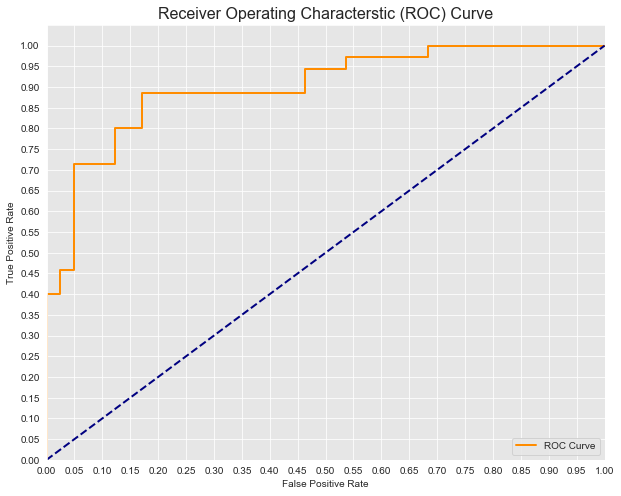

In [9]:
# implement roc_curve
test_fpr, test_tpr, thresholds = roc_curve(y_test, y_hat_test)

print('AUC: {}'.format(auc(test_fpr, test_tpr)))
plt.figure(figsize=(10,8))
lw = 2
plt.plot(test_fpr, test_tpr, color="darkorange", lw=lw, label="ROC Curve")
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks([i/20.0 for i in range(21)])
plt.yticks([i/20.0 for i in range(21)])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characterstic (ROC) Curve", fontsize=16)
plt.legend(loc="lower right")
plt.show()

## Update your ROC curve to not only include a graph of the test set, but one of the train set

Test AUC: 0.8996515679442508
Train AUC: 0.9291038858049168


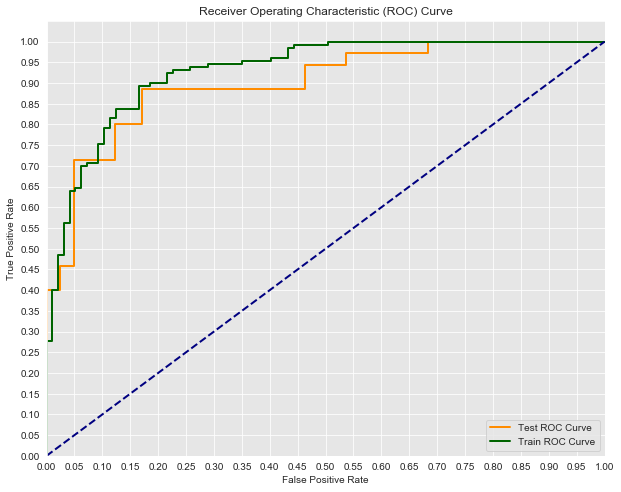

In [10]:
# Your code here
y_hat_train = sigmoid(np.dot(X_train, weights))
train_fpr, train_tpr, thresholds_train = roc_curve(y_train, y_hat_train)

print("Test AUC: {}".format(auc(test_fpr, test_tpr)))
print("Train AUC: {}".format(auc(train_fpr, train_tpr)))

# Redo the plot adding training fpr and tpr
plt.figure(figsize=(10,8))
lw = lw
plt.plot(test_fpr, test_tpr, color="darkorange", lw=lw, label="Test ROC Curve")
plt.plot(train_fpr, train_tpr, color="darkgreen", lw=lw, label="Train ROC Curve")
plt.plot([0, 1], [0,1], color="navy", lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks([i/20.0 for i in range(21)])
plt.yticks([i/20.0 for i in range(21)])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

## Create a confusion matrix for your predictions

Use a standard decision boundary of .5 to convert your probabilities output by logistic regression into binary classifications. (Again this should be for the test set.) Afterward, feel free to use the built-in scikit-learn methods to compute the confusion matrix as we discussed in previous sections.

In [11]:
# Your code here
import itertools

def binary_prediction(probabilities, threshold=0.5):
    classes = []
    for p in probabilities:
        if p >= threshold:
            classes.append(1)
        else:
            classes.append(0)
    return classes

test_predictions = binary_prediction(y_hat_test)

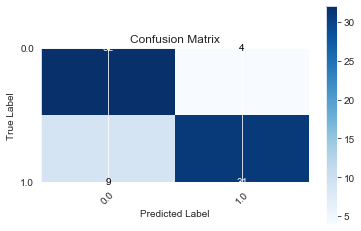

In [12]:
# Using sklearn to compute confusion matrix
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(test_predictions, y_test)

#Create the basic matrix
plt.imshow(cnf_matrix, cmap=plt.cm.Blues)
#Add title and axis labels
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")

#Add appropriate Axis Scales
class_names = set(y) # retrieve class labels to add to the matrix
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

#Add labels to each cell
thresh = cnf_matrix.max() / 2. #Used for text coloring below
#Iterate through the conf matrix and append labels to our visualization
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j], 
            ha="center", va="center", color="white" if cnf_matrix[i,j] > thresh else "black")

#plt.tight_layout
#Add sidebar legend
plt.colorbar()

## Initial Model - scikit-learn

Do the same using the built-in method from scikit-learn. To start, create an identical model as you did in the last section; turn off the intercept and set the regularization parameter, C, to a ridiculously large number such as 1e16. 

In [13]:
# Your code here
logreg = LogisticRegression(fit_intercept=False, C=1e16, solver="liblinear")
logreg.fit(X_train, y_train)

LogisticRegression(C=1e+16, class_weight=None, dual=False, fit_intercept=False,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

## Create an ROC Curve for the scikit-learn model

AUC: 0.8996515679442508


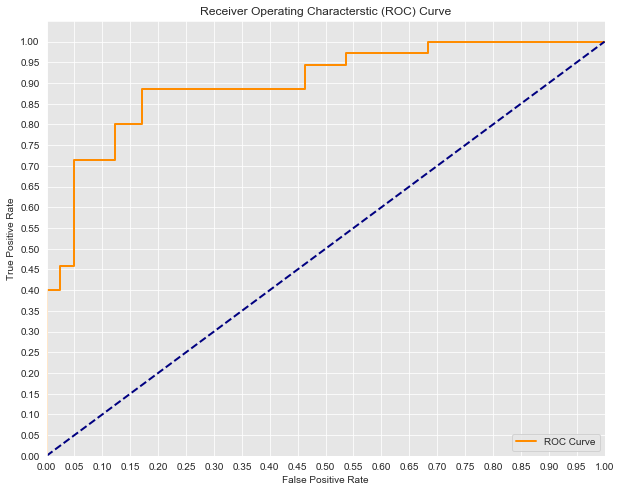

In [14]:
#Your code here
y_score = logreg.decision_function(X_test)
fpr_test, tpr_test, thresholds = roc_curve(y_test, y_score)

print("AUC: {}".format(auc(fpr_test, tpr_test)))

plt.figure(figsize=(10,8))
lw=lw
plt.plot(fpr_test, tpr_test, color="darkorange", lw=lw, label="ROC Curve")
plt.plot([0,1], [0,1], color="navy", lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks([i/20.0 for i in range(21)])
plt.yticks([i/20.0 for i in range(21)])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characterstic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

## As before add an ROC curve to the graph for the train set as well

Test AUC: 0.8996515679442508
Train AUC: 0.9291038858049168


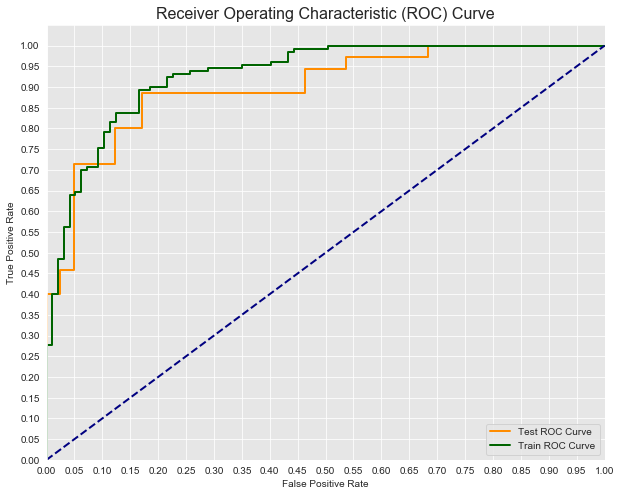

In [15]:
#Your code here
y_score_train = logreg.decision_function(X_train)
fpr_train, tpr_train, thresholds = roc_curve(y_train, y_score_train)

print("Test AUC: {}".format(auc(fpr_test, tpr_test)))
print("Train AUC: {}".format(auc(fpr_train, tpr_train)))

plt.figure(figsize=(10,8))
lw=2
plt.plot(fpr_test, tpr_test, color="darkorange", lw=lw, label="Test ROC Curve")
plt.plot(fpr_train, tpr_train, color="darkgreen", lw=lw, label="Train ROC Curve")
plt.plot([0,1], [0,1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks([i/20.0 for i in range(21)])
plt.yticks([i/20.0 for i in range(21)])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve", fontsize=16)
plt.legend(loc="lower right")
plt.show()

## Adding an Intercept

Now add an intercept to the scikit-learn model. Keep the regularization parameter C set to a very large number such as 1e16. Plot all three models ROC curves on the same graph.

Custom Model Test AUC: 0.8996515679442508
Custom Model Train AUC: 0.9291038858049168
Sklearn Mod 1 Test AUC: 0.8996515679442508
Sklearn Mod 1 Train AUC: 0.9291038858049168
Sklearn Mod 2 Test AUC: 0.8989547038327527
Sklearn Mod 2 Train AUC: 0.9325931800158604


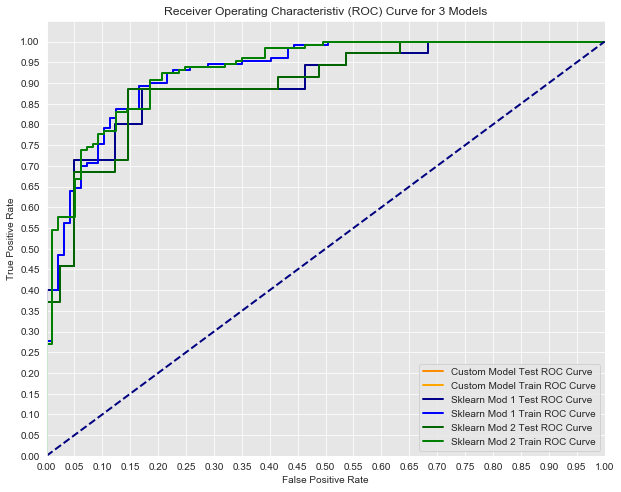

In [20]:
# Your code here
logreg_int = LogisticRegression(fit_intercept=True, C=1e16, solver="liblinear")
logreg_int.fit(X_train, y_train)

# Initial Model (manual) test_ and train_
print("Custom Model Test AUC: {}".format(auc(test_fpr, test_tpr)))
print("Custom Model Train AUC: {}".format(auc(train_fpr, train_tpr)))

plt.figure(figsize=(10,8))
lw = 2
plt.plot(test_fpr, test_tpr, color="darkorange", lw=lw, label="Custom Model Test ROC Curve")
plt.plot(train_fpr, train_tpr, color="orange", lw=lw, label="Custom Model Train ROC Curve")


# Second Model - Sklearn Module 1
print("Sklearn Mod 1 Test AUC: {}".format(auc(fpr_test, tpr_test)))
print("Sklearn Mod 1 Train AUC: {}".format(auc(fpr_train, tpr_train)))

plt.plot(fpr_test, tpr_test, color="darkblue", lw=lw, label="Sklearn Mod 1 Test ROC Curve")
plt.plot(fpr_train, tpr_train, color="blue", lw=lw, label="Sklearn Mod 1 Train ROC Curve")


#Third Model plots - Sklearn Module 2
y_test_score_i = logreg_int.decision_function(X_test)
y_train_score_i = logreg_int.decision_function(X_train)

fpr_train_i, tpr_train_i, thresholds = roc_curve(y_train, y_train_score_i)
fpr_test_i, tpr_test_i, thresholds = roc_curve(y_test, y_test_score_i)

print("Sklearn Mod 2 Test AUC: {}".format(auc(fpr_test_i, tpr_test_i)))
print("Sklearn Mod 2 Train AUC: {}".format(auc(fpr_train_i, tpr_train_i)))

plt.plot(fpr_test_i, tpr_test_i, color="darkgreen", lw=lw, label="Sklearn Mod 2 Test ROC Curve")
plt.plot(fpr_train_i, tpr_train_i, color="green", lw=lw, label="Sklearn Mod 2 Train ROC Curve")

# Plot Formatting
plt.plot([0,1], [0,1], color="navy", lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks([i/20.0 for i in range(21)])
plt.yticks([i/20.0 for i in range(21)])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristiv (ROC) Curve for 3 Models")
plt.legend(loc="lower right")
plt.show()

## Altering the Regularization Parameter

Now, experiment with altering the regularization parameter. At a minimum, create 5 different subplots with varying regularization (C) parameters. For each, plot the ROC curve of the train and test set for that specific model.  

Regularization parameters between 1 and 20 are recommended. Observe the difference in test and train auc as you go along.

Test AUC with C=1.5^0: 0.9094076655052264
Train AUC with C=1.5^0: 0.9221252973830293
Test AUC with C=1.5^1: 0.9059233449477352
Train AUC with C=1.5^1: 0.9249008723235527
Test AUC with C=1.5^2: 0.9059233449477352
Train AUC with C=1.5^2: 0.9256145915939731
Test AUC with C=1.5^3: 0.9052264808362369
Train AUC with C=1.5^3: 0.9287073750991277
Test AUC with C=1.5^4: 0.9052264808362369
Train AUC with C=1.5^4: 0.9303727200634417
Test AUC with C=1.5^5: 0.9059233449477352
Train AUC with C=1.5^5: 0.9314036478984933
Test AUC with C=1.5^6: 0.9052264808362369
Train AUC with C=1.5^6: 0.9321173671689136
Test AUC with C=1.5^7: 0.9031358885017422
Train AUC with C=1.5^7: 0.9318001586042823


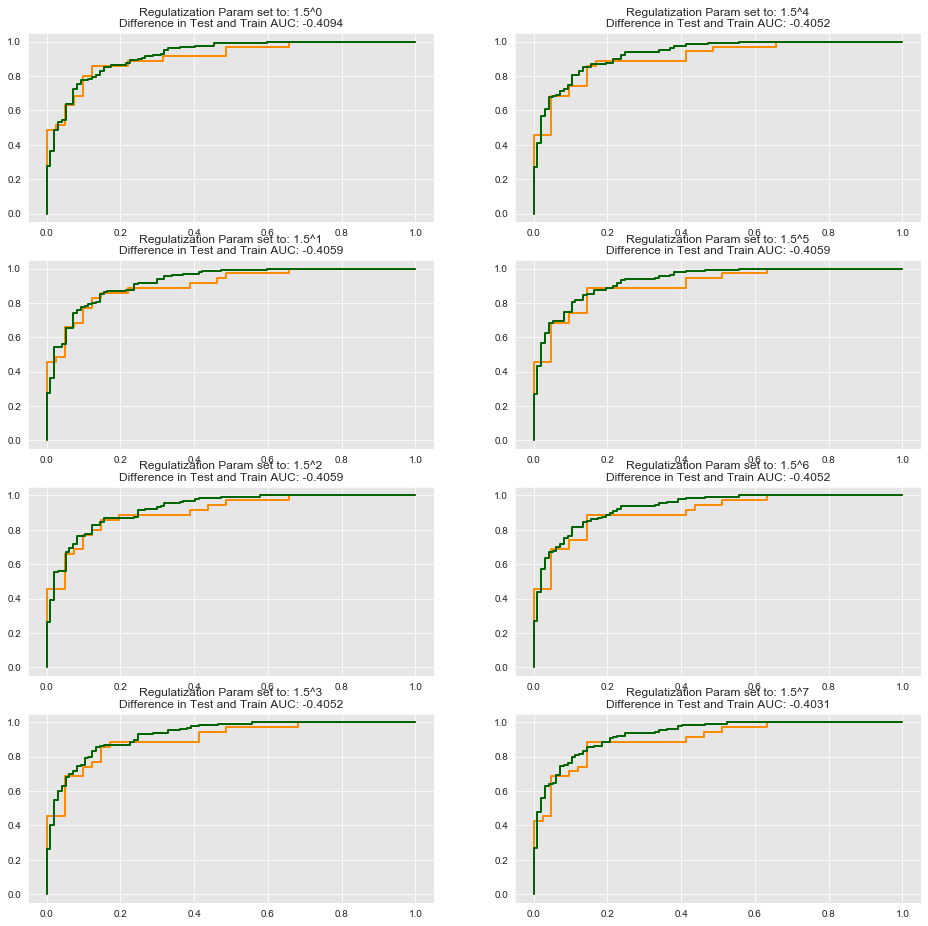

In [22]:
# Your code here
fig, axes = plt.subplots(4, 2, figsize=(16, 16))
for n in range(8): #creating 8 subplots
    i = n%4
    j = n//4
    ax = axes[i, j]
    #Fit a model
    logreg = LogisticRegression(fit_intercept=True, C=1.5**(n), solver="liblinear")
    logreg.fit(X_train, y_train)
    #Print Stats
    y_test_score = logreg.decision_function(X_test)
    y_train_score = logreg.decision_function(X_train)
    
    test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)
    train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score)
    
    test_auc = auc(test_fpr, test_tpr)
    train_auc = auc(train_fpr, train_fpr)
    auc_diff = round(train_auc - test_auc, 4)
    
    print("Test AUC with C=1.5^{}: {}".format(n, auc(test_fpr, test_tpr)))
    print("Train AUC with C=1.5^{}: {}".format(n, auc(train_fpr, train_tpr)))
    
    #Add plot
    ax.plot(test_fpr, test_tpr, color="darkorange", lw=lw, label="Test ROC Curve")
    ax.plot(train_fpr, train_tpr, color="darkgreen", lw=lw, label="Train ROC Curve")
    ax.set_title("Regulatization Param set to: 1.5^{}\nDifference in Test and Train AUC: {}".format(n, auc_diff))

## Comment on how the Regularization Parameter Impacts the ROC curves plotted above

#Your response here

It appears that the highest test AUC comes with the highest C parameter, the highest regularization parameter. This is also confirmed by this model having the lowest AUC difference between its train and test results.

## Summary

In this lab, you reviewed many of the accuracy measures for classification algorithms and observed the impact of additional tuning models using intercepts and regularization.